1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


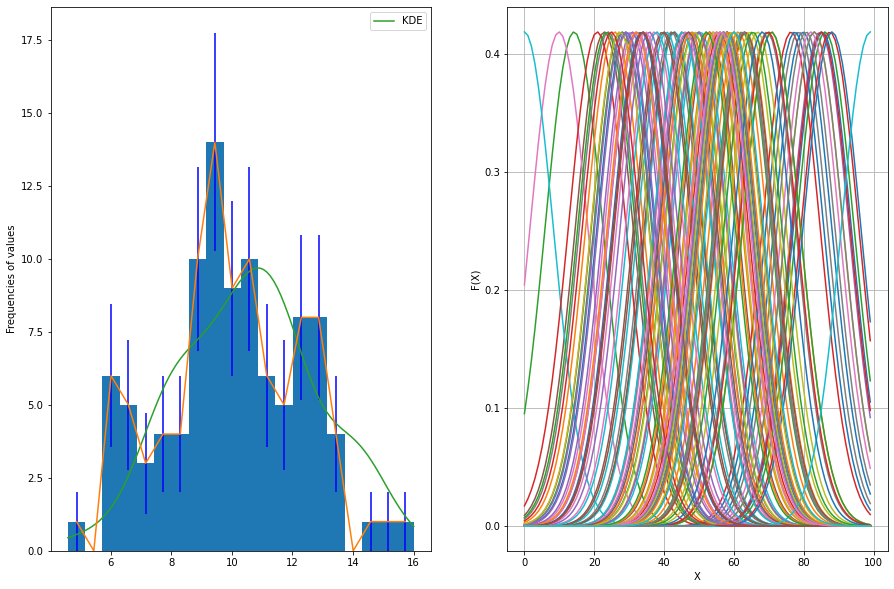

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from scipy import integrate

mu = 10
sigma=2
N = 100

x = np.random.normal(mu, sigma, N) #normally distributed 100 elements np array with mean mu=10, and standard deviation sigma = 2.


fig, ax = plt.subplots(1,2, figsize=(15,10))
n, bins, patches = ax[0].hist(x, bins=20)
mean_bins= [(bins[i]+bins[i+1])/2 for i in range(len(n))]
ax[0].set_ylabel('Frequencies of values')
ax[0].errorbar(mean_bins, n, n**0.5, ecolor='blue')

#gaussians
sigma = 1.06*np.std(x)*len(x)**(-1/5)
vector_x = np.linspace(np.max(x), np.min(x), len(x))

g_total=np.zeros(len(x))
for i in x:
    gaussians = stats.norm(i, sigma).pdf(vector_x)
    ax[1].plot(gaussians)
    g_total=gaussians + g_total
ax[1].set_xlabel('X')
ax[1].set_ylabel('F(X)')
ax[1].grid()

norm = sp.integrate.trapz(y=g_total,x=np.linspace(np.min(x),np.max(x),N))
area=sum(n*(bins[1:] - bins[:-1]))
KDE = area*g_total/norm
ax[0].plot(np.linspace(np.min(x),np.max(x),N),KDE, label="KDE")
ax[0].legend()


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

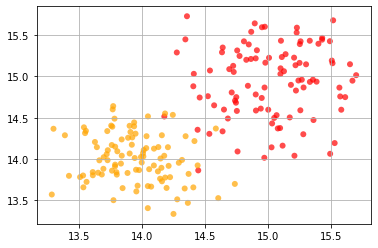

(None, None)

In [85]:
import numpy.random as npr
def generate_datasets(mean,std):
    x=npr.normal(mean, std, 100)
    y=npr.normal(mean, std, 100)
    return (x,y)

x1, y1 = generate_datasets(15,0.4)
x2, y2 = generate_datasets(14, 0.3)

plt.scatter(x1,y1, c = 'red', alpha=0.7, edgecolors='none')
plt.scatter(x2,y2, c = 'orange', alpha=0.7, edgecolors='none')
plt.grid(True),plt.show()



--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

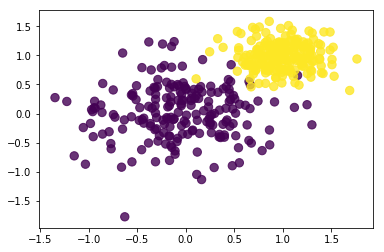

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

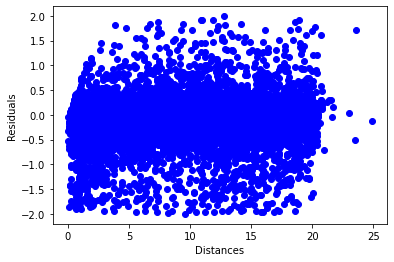

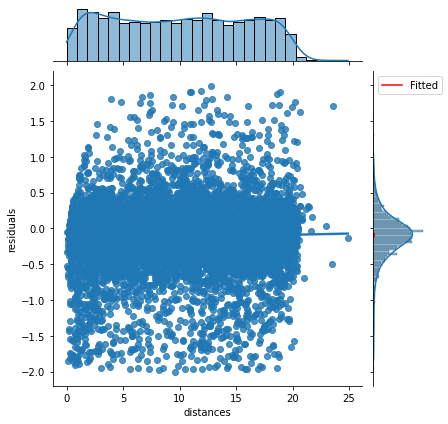

In [7]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

data=np.load('/home/emersonvero/residuals_261.npy',  allow_pickle=True)
data = pd.DataFrame(data.item())
data = data[abs(data.residuals)<2]
slope, intercept, rvalue, pvalues, stderr = scipy.stats.linregress(data.distances,data.residuals)
plt.scatter(data.distances,data.residuals,color="b",label="marks")
plt.xlabel("Distances")
plt.ylabel("Residuals")
auxiliar = sns.jointplot(x='distances', y='residuals', data=data, kind="reg")
auxiliar
y = data.distances*slope + intercept
plt.plot(data.distances,y,color="r",label="Fitted")
plt.legend()





<ErrorbarContainer object of 3 artists>

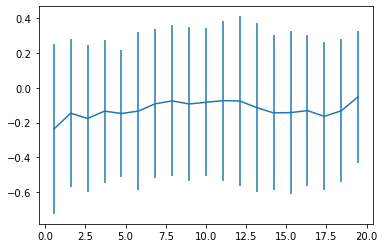

In [8]:
n_bins=20
x = np.linspace(0,20, n_bins)

s=x[1]/2
x+=s
x=x[:-1]

y=[]
erry=[]
cont=0
for b in x:
    data2=data[data.distances>b-s]
    data3=data3[data3.distances<=b+s]
    y.append(np.mean(d.residuals))
    erry.append(np.std(d.residuals))
    cont+=len(d)
y=np.array(y)   
err_y=np.array(err_y)

plt.errorbar(x,y,erry)

Text(0, 0.5, 'Residuals means and errors')

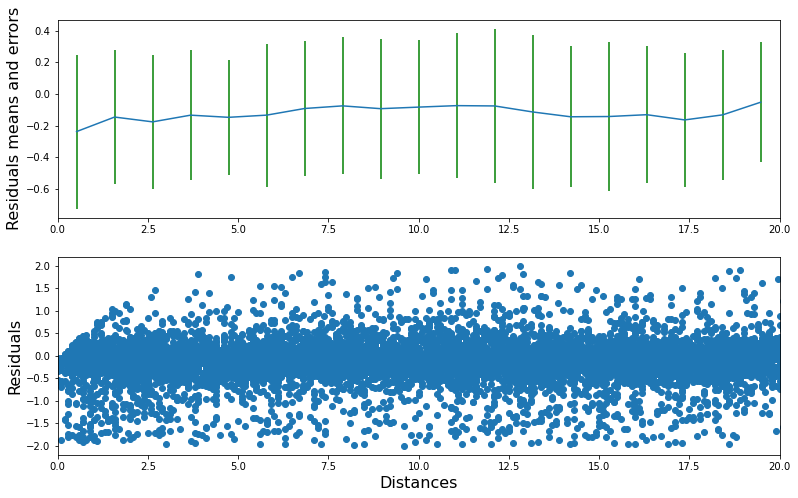

In [40]:
gridsize = (2, 3)
fig = plt.figure(figsize=(20, 8))
ax2 = plt.subplot2grid(gridsize, (1, 0),colspan=2, rowspan=2)
ax2.scatter(data.distances.values, data.residuals.values)
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=1)
ax1.errorbar(x,y,err_y,ecolor='green')
ax2.set_xlim([0, 20])
ax1.set_xlim([0, 20])
ax2.set_xlabel('Distances',fontsize=16)
ax2.set_ylabel('Residuals',fontsize=16)
ax1.set_ylabel('Residuals in beans of distance',fontsize=16)
